
# <center> UDACITY Data Analysis Nanodegree </center> 
## <center> Project:- Visualizing FordGoBike Data</center>
#### Grant Patience, 16th September 2019


## Investigation Overview

> In this data analyis of the Ford GoBike data, we want to investigate common customer behaviors and demographics, such as peak usage times, and the effect of different behavioural patterns affect usage such as user type, gender, and age. 

## Dataset Overview

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
>
>Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.
>
>After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.[5] The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

path = r'D:\Data\FordGoBike'

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgo_master_clean.csv')

In [6]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colour = '#86bf91'

## Bike Usage by Month

> We can see a general growing trend of rental usage from 2018 to 2019. Additionally, we find that there there is a seasonal trend to the data where people are more likely to ues the bikes in the summer and early months of autumn. While are less likely in the winter months. Growth year on year is interesting - we can see that January, February, March and April all grow substantially year on year, while June and July remain relativley static year on year.

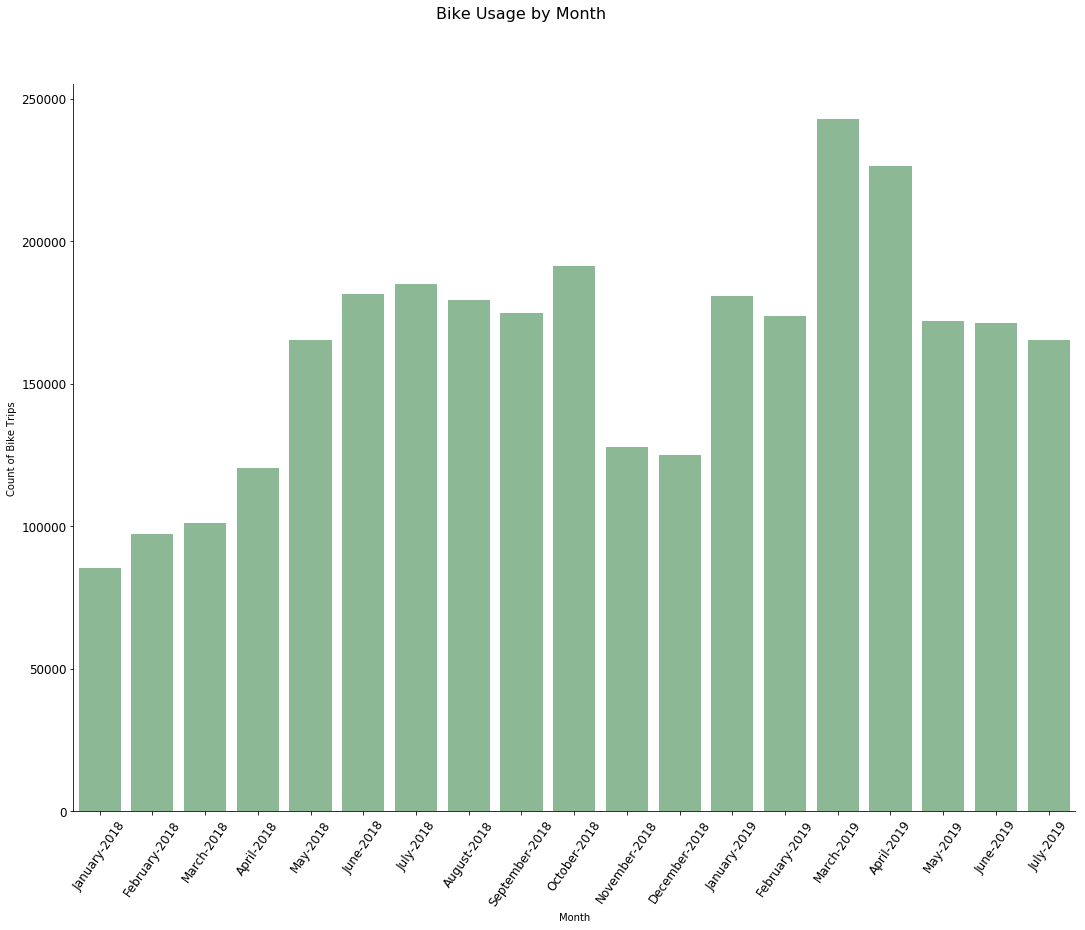

In [5]:
# Monthly usage of the Ford Go Bike system

g = sb.catplot(data = df,  x = 'start_month', kind = 'count', color = '#86bf91');
g.set_axis_labels('Month', 'Count of Bike Trips'),
g.fig.suptitle('Bike Usage by Month', y=1.05, fontsize = 16);
g.fig.set_size_inches(18,12)
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);

## Bike Usage by Day of the Week

>  We can see strong usage numbers across the mid-week days, with total usage peaking across Tuesday, Wednesday and Thursday. Monday & Friday are close behind. Saturday and Sunday both sit around half the usage as a mid-week. We can interpret this as the majority of users are using the bikes for work-day commute and other activities, given the predominant work patter is Monday to Friday in the US.

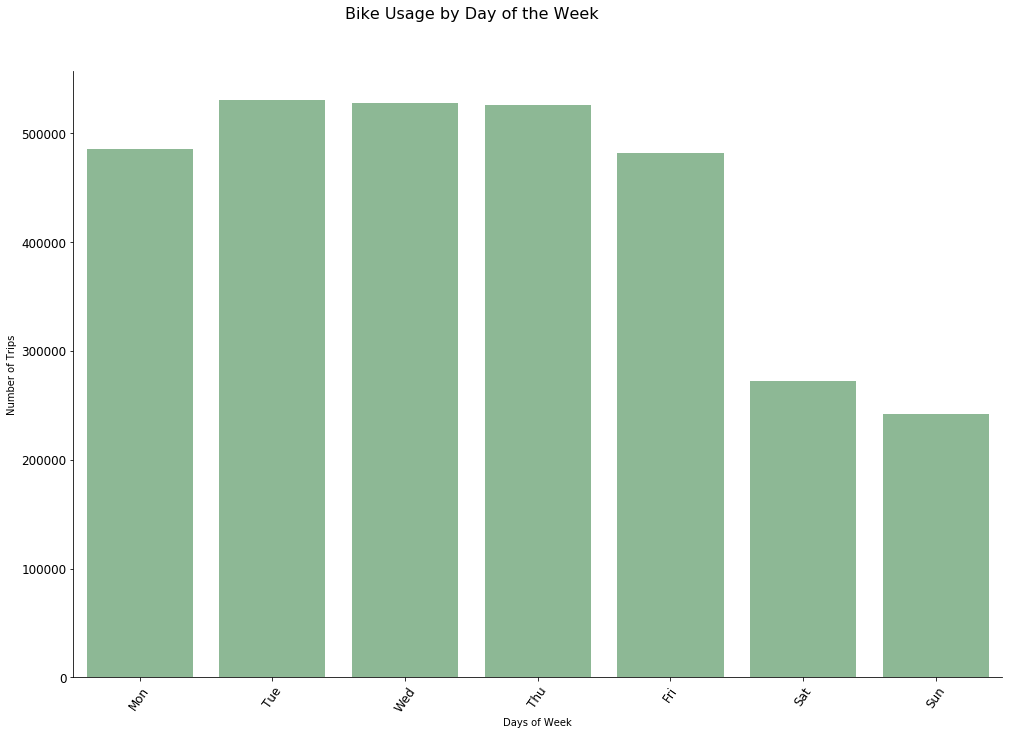

In [8]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df, x='start_weekday', kind='count', color = colour, order = weekday)
g.fig.set_size_inches(16,10)
g.set_axis_labels("Days of Week", "Number of Trips")
g.fig.suptitle('Bike Usage by Day of the Week', y=1.05, fontsize=16);
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);

## Hourly Bike Usage
> By analysing the hourly usag data, we can see the distribution is bimodal in nature. Furthermore, this distribution looks to confirm the earlier supposition that the weekday usage is primarily driven by commuters. This is driven by the peak times of 8-9am, and 5-6pm where the majority of the workforce tend to make their daily commute.

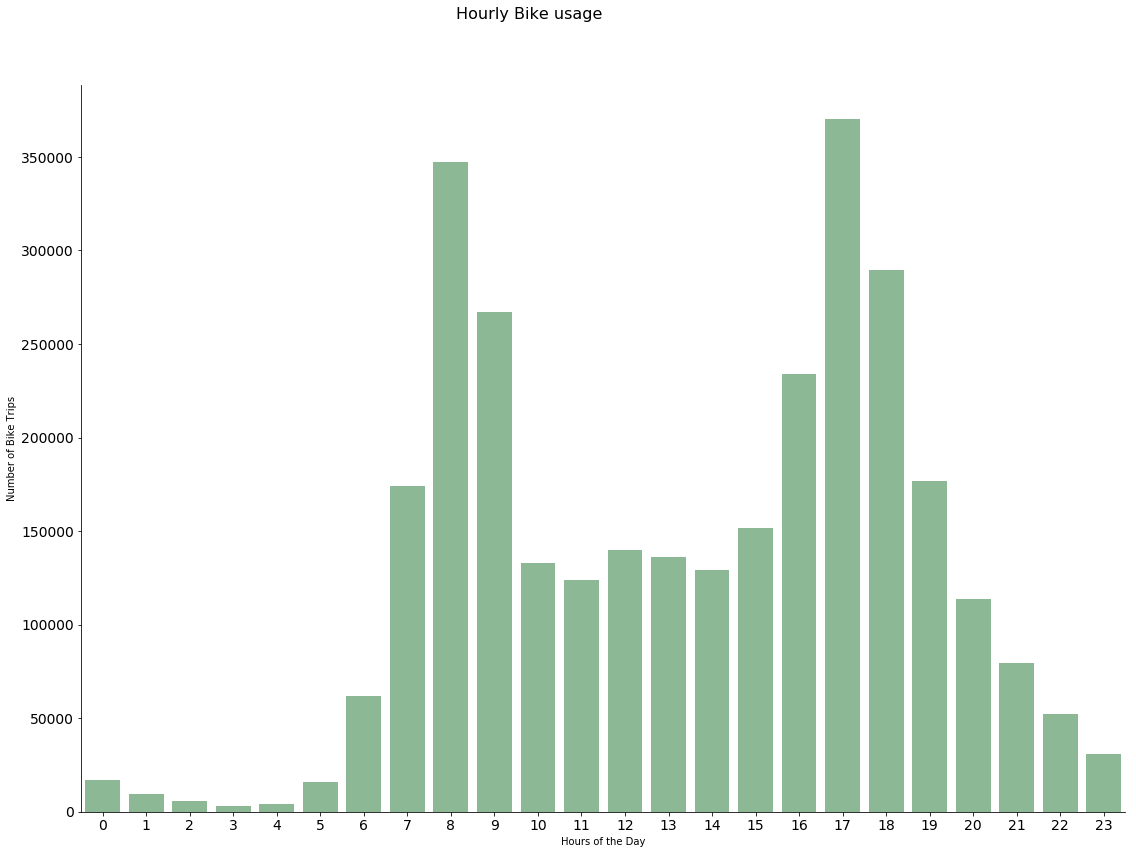

In [9]:
g = sb.catplot(data=df, x='start_time_hour', kind='count', color = colour)
g.set_axis_labels("Hours of the Day", "Number of Bike Trips")
g.fig.set_size_inches(18,12)
g.fig.suptitle('Hourly Bike usage', y=1.05, fontsize=16);
#g.set_xticklabels(rotation=55, fontsize=12);
g.set_xticklabels(fontsize=14);
g.set_yticklabels(fontsize=14);

## Count of Bike Trips by Various Demographics
>By plotting multiple demographic types in one chart, we can see a snapshot of usage across many demographics. The below chart appears to illustrate that the majority of bike users are between the ages of 20 and 40, while being more likely to be male and are a subscriber to the rental system.


Text(0.5, 0.98, 'User Demographics by Number of Bike Rides')

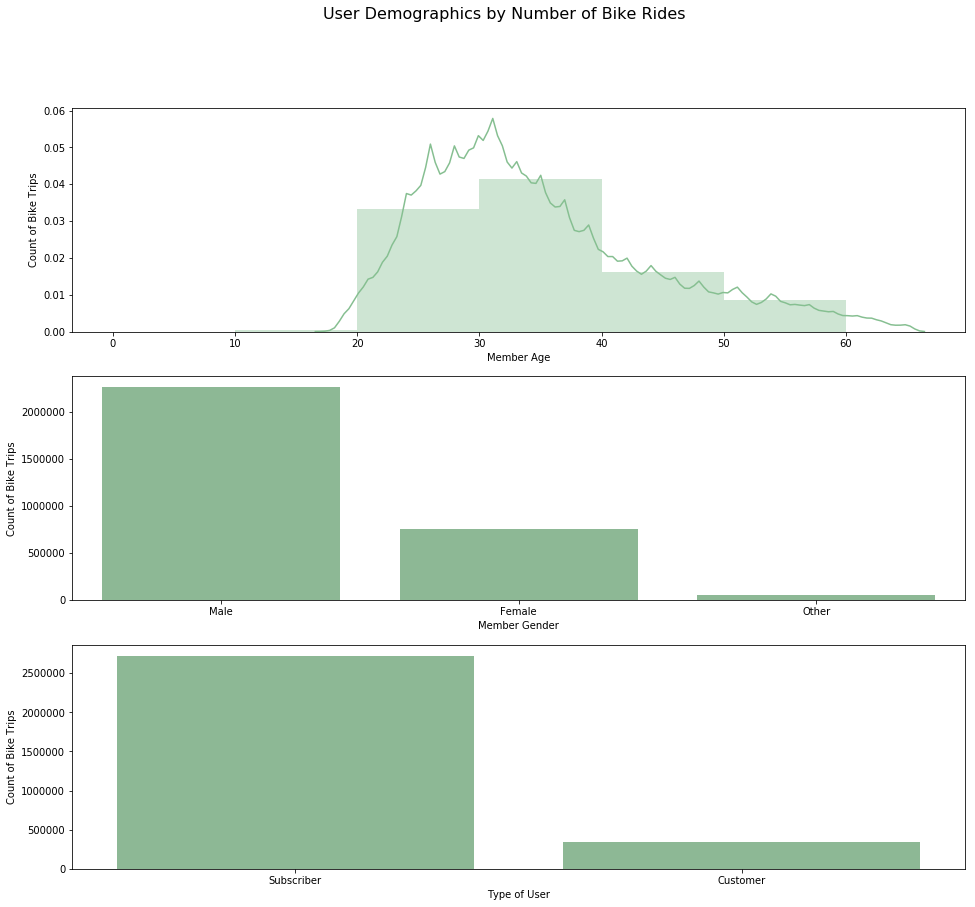

In [10]:
fig, ax = plt.subplots(nrows=3, figsize = [16,14])
age_bin_edges = np.arange(0, 70, 10)

#sb.countplot(data = df, x = 'member_age',  color = colour, ax = ax[0])
sb.distplot(df['member_age'], bins = age_bin_edges, color = colour, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = colour, ax = ax[1])
sb.countplot(data = df, x = 'user_type', color = colour, ax = ax[2])
ax[0].set_xlabel('Member Age');
ax[0].set_ylabel('Count of Bike Trips');
ax[1].set_xlabel('Member Gender');
ax[1].set_ylabel('Count of Bike Trips');
ax[2].set_xlabel('Type of User');
ax[2].set_ylabel('Count of Bike Trips');

fig.suptitle('User Demographics by Number of Bike Rides',  fontsize=16)

## Count of Bike Trips by User Type Over Months

>There is a marked decrease in bike rental activity by each user type. Interestingly they both generally share the same trends over the seasons.

In [11]:
# monthly usege of the bike sharing system per user type
g = sb.catplot(data=df, x='start_month', col="user_type", kind='count', sharey = False,
            color = colour)
g.fig.set_size_inches(18,12)
g.set_axis_labels("Month", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);
g.fig.suptitle('Count of Bike Trips by User Type Over Months', y=1.03, fontsize=16);


## Count of Bike Trips by User Type by Hour of the Day

>While the Subscriber user type resembles the overall hourly usage pattern, by digging deeper into user type we discover that the smaller subset of Customers is more evenly spread throughout all hours between 8am and 7pm, although still bimodal, it is not as severe a dop off outside of the rush hour rentals, compared to the Subscriber.
>
>This looks like it lends itself to a theory that Subscribers are more likely to be using the Bikes for daily work day commutes, while Customers are possibly more leisurely.

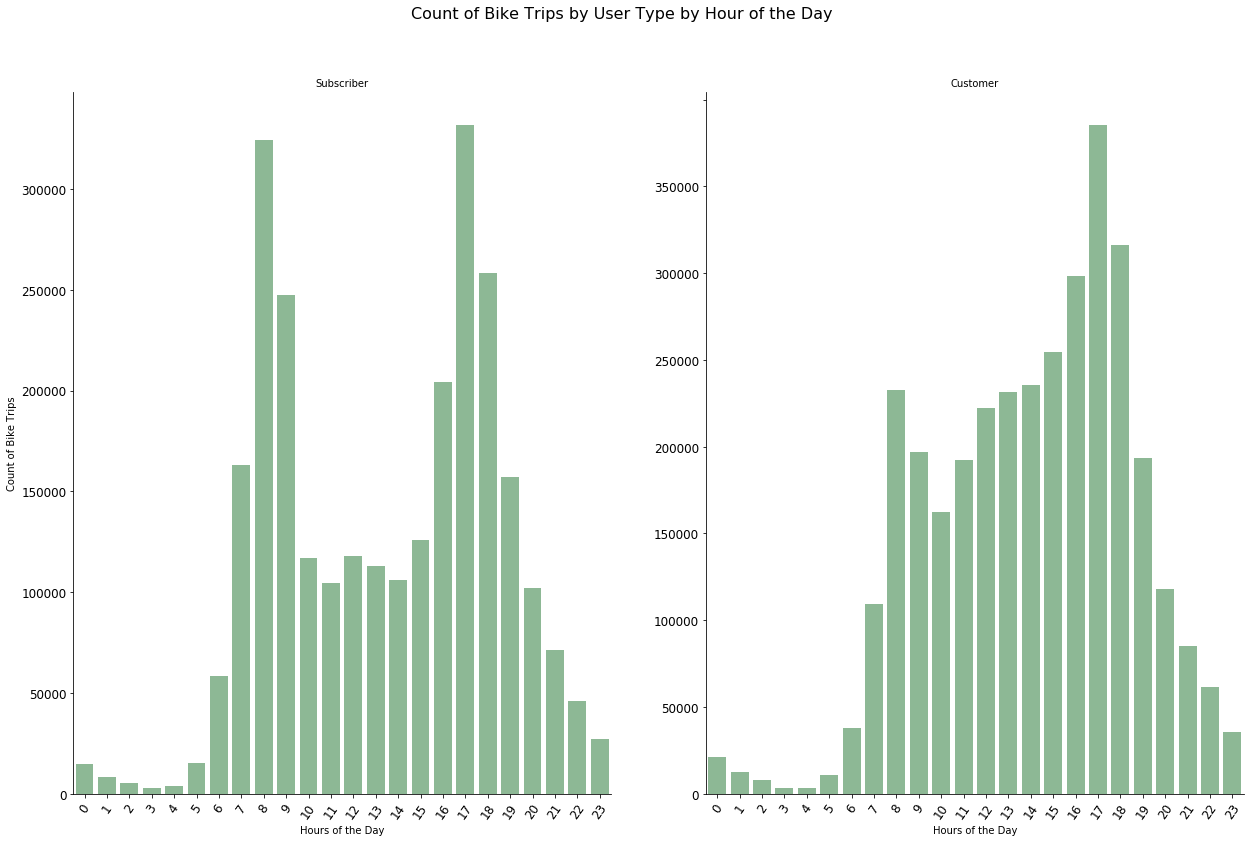

In [12]:
g = sb.catplot(data=df, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = colour)
g.fig.set_size_inches(18,12)
g.set_axis_labels("Hours of the Day", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);
g.fig.suptitle('Count of Bike Trips by User Type by Hour of the Day', y=1.03, fontsize=16);

## Distance by User Type

>After the interesting divergence of usage times by user type, we wanted to investigate whether there was a reason for that. We find that the vast majority of users use the bikes for less than two miles.
>
>There is a slight, but noticable difference in the mean distances travelled; Customers are slightly higher than Subscribers. This may be related to trend of subscribers being more likely to use the Bike rental for commute, while customers are not commuting.

In [13]:
plt.figure(figsize = [16, 10])

plt.title("Number of Bike Rides by User Types by Number of Bike Rides", y=1.05, fontsize=16);
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df.query('distance_miles>0.01  and distance_miles < 5'), x = 'user_type', y = 'distance_miles', color = colour)
plt.xlabel('User Type',fontsize= 12)
plt.ylabel('Distance in Miles',fontsize= 12);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df.query('distance_miles>0.01  and distance_miles < 5'), x = 'user_type', y = 'distance_miles', color = colour)
plt.xlabel('User Type',fontsize= 12)
plt.ylabel('Distance in Miles',fontsize= 12);

plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot);

(-0.3502518249193916, 5.3395121878797855)

## Mean Distance of Bike Trips by Age of Member

> After seeing the divergence in distance travelled by user type, I wondered if there would be a difference is distance travelled by age, assuming that certain age groups would not be commuters, which may change the distance metric. 
>
>However, after the analysis, we find that the mean distance travelled of 2 miles is consistent across all age groups.

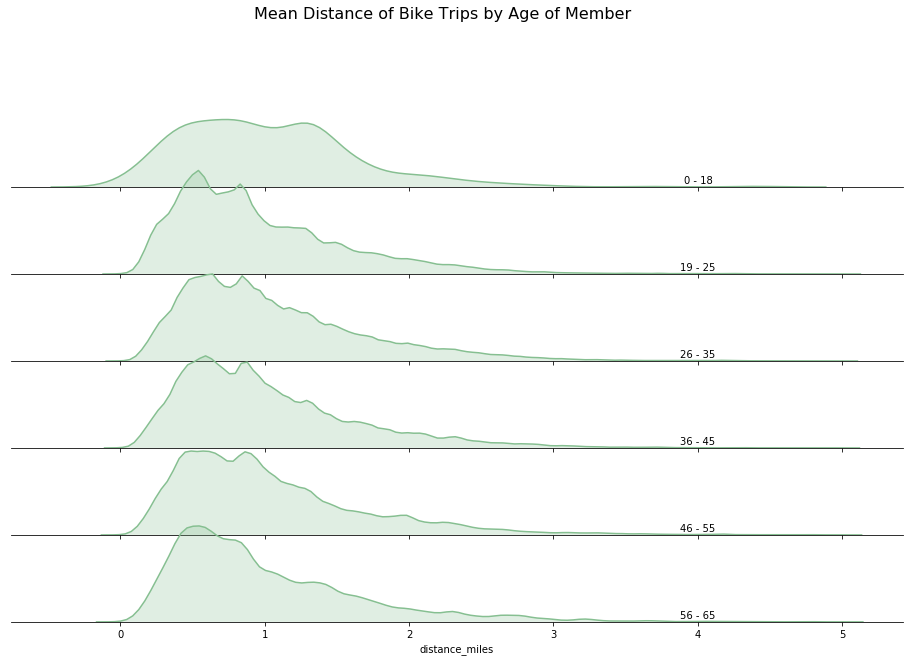

In [15]:
group_means = df.groupby(['age_bracket']).count()
age_order = group_means.sort_values(['age_bracket'], ascending = True).index

g = sb.FacetGrid(data = df.query('distance_miles>0.01  and distance_miles < 5'), row = 'age_bracket', size = 0.5, aspect = 12,
                 row_order = age_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'distance_miles', color = colour, shade = True)

g.fig.set_size_inches(16,10)
g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'age_bracket')
g.set_xlabels('distance_miles')
g.set_titles('')
g.fig.suptitle('Mean Distance of Bike Trips by Age of Member', fontsize=16);

## Count of Bike trips by User Type and Age of Member

> Having investigated distance by age group, I began to wonder if there was a difference in usage in age group and user type. >
>
> We find that the distribution of users among age groups is simalr between subscriber and customer.

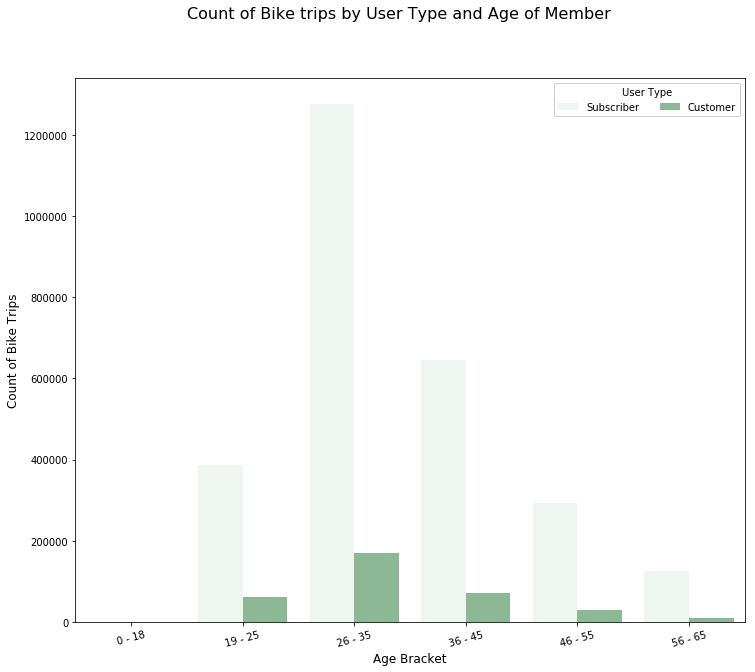

In [16]:
fig, ax = plt.subplots(figsize=[12,10])

ax = sb.countplot(data = df, x = 'age_bracket', hue = 'user_type', color=colour, order=age_order)

ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type')
plt.xticks(rotation = 15)
plt.xlabel('Age Bracket',fontsize= 12)
plt.ylabel('Count of Bike Trips',fontsize= 12);

fig.suptitle('Count of Bike trips by User Type and Age of Member', fontsize=16);

## Count of Bike Trips per user type and gender

> On further analysis, we can see here is that for the Subscriber user type, the user is much more likely to be male than female. While for the customer user type, the difference is closer but still greatly in favour in males. This would indicate an opportunity for growth if we can expand the number of female users

In [17]:


g = sb.catplot(data=df, x='age_bracket', col="user_type", hue="member_gender", color=colour, kind='count', sharey = False, order=age_order)
g.fig.set_size_inches(14,10)
g.set_axis_labels("Age Bracket", "Count of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Count of Bike Trips per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

## Bike Usage During Day and Times Across Age Group

>When we split the usage times by age group, we see some interesting fators. the 0-18 age group usage is low in comparison, but not tied to any particular usage time. the 26-35 age group has the strongest relation to the peak hours of 8-9am and 5-6pm, Monday to Friday. Other age groups have this same correlation, but become more spread throughout the day as we look at the older age groups, in particular in group 56 - 65 we can see a heavier usage mid-day, which would indicate fewer commuters, aligning to the increased likelihood of retirees in this age group

In [18]:
df_usage_0_18 = df[df['age_bracket']=='0 - 18']
df_usage_19_25 = df[df['age_bracket']=='19 - 25']
df_usage_26_35 = df[df['age_bracket']=='26 - 35']
df_usage_36_45 = df[df['age_bracket']=='36 - 45']
df_usage_46_55 = df[df['age_bracket']=='46 - 55']
df_usage_56_65 = df[df['age_bracket']=='56 - 65']

df_usage_user_0_18 = df_usage_0_18.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_0_18 = df_usage_user_0_18.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_19_25 = df_usage_19_25.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_19_25 = df_usage_user_19_25.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_26_35 = df_usage_26_35.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_26_35 = df_usage_user_26_35.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_36_45 = df_usage_36_45.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_36_45 = df_usage_user_36_45.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_46_55 = df_usage_46_55.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_46_55 = df_usage_user_46_55.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_56_65 = df_usage_56_65.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_56_65 = df_usage_user_56_65.pivot("start_weekday", "start_time_hour", "bike_id")

#plt.figure(figsize=(15,10))
f, [axA, axB, axC, axD, axE, axF] = plt.subplots(figsize=(30, 40), nrows=6)
cmap = sb.cubehelix_palette(start=1.3, rot=1.3, as_cmap=True)
sb.heatmap(df_usage_user_0_18, annot=True, cmap=cmap, linewidths=0.05, ax=axA )
sb.heatmap(df_usage_user_19_25, annot=True, cmap=cmap, linewidths=0.05, ax=axB )
sb.heatmap(df_usage_user_26_35, annot=True, cmap=cmap, linewidths=0.05, ax=axC )
sb.heatmap(df_usage_user_36_45, annot=True, cmap=cmap, linewidths=0.05, ax=axD )
sb.heatmap(df_usage_user_46_55, annot=True, cmap=cmap, linewidths=0.05, ax=axE )
sb.heatmap(df_usage_user_56_65, annot=True, cmap=cmap, linewidths=0.05, ax=axF )


axA.set_title('Bike Usage During Day and Times Age Group 0 - 18')
axB.set_title('Bike Usage During Day and Times Age Group 19 - 25')
axC.set_title('Bike Usage During Day and Times Age Group 26 - 35')
axD.set_title('Bike Usage During Day and Times Age Group 36 - 45')
axE.set_title('Bike Usage During Day and Times Age Group 46 - 55')
axF.set_title('Bike Usage During Day and Times Age Group 56 - 65')

plt.xlabel('Hours of the day',fontsize= 12)
plt.ylabel('Days of the Week',fontsize= 12);
#plt.yticks(rotation=90)
plt.title("Bike Usage During Day and Times", y=1.05, fontsize=16);

## Conclusion

>Our analysis has of the GoBike data from the San Francisco bay area has led us to the conclusion that the bike rental system is well utilised, with over 3 million trips since January 2018. Being an economical, environmentally friendly system that we should look to take advantage of and grow.
>- The majority of users are male, which gives growth opportunity in the female demographic
>- Most likely time of use is 8-9am and 5-6pmp, Monday to Friday, leading us to believe the rentals are mostly for commute purposes. 
>- Customer user types are generally used throughout the day, but more likely at the weekend. Leading us to believe there is a small market for leisure or holiday users, but there could be growth potential here.
>- Users are by far most likely to be within hte 26 - 35 age bracket.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert Communicate_Data_Slide_Deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!